# Flight Price Prediction
project 7

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("Flight_Data_Train.xlsx")
# pd.set_option('display.max_rows',None)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_test=pd.read_excel("Flight_Test_set.xlsx")
# pd.set_option('display.max_rows',None)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
print("No: of Rows and columns for Train data set : ",df_train.shape)
print("No: of Rows and columns for Test data set  : ",df_test.shape)

No: of Rows and columns for Train data set :  (10683, 11)
No: of Rows and columns for Test data set  :  (2671, 10)


In [5]:
df_train["dataset_type"]="Train"
df_test["dataset_type"]="Test"

In [6]:
df_concat=pd.concat([df_train,df_test],ignore_index=True)

In [7]:
df_concat.shape

(13354, 12)

In [8]:
print( "Total rows and columns respectively are :",df_concat.shape)
#pd.set_option('display.max_rows',None)
df_concat.head()

Total rows and columns respectively are : (13354, 12)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset_type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train


In [9]:
df_concat["dataset_type"].value_counts()

Train    10683
Test      2671
Name: dataset_type, dtype: int64

In [10]:
df_concat.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset_type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train


In [11]:
df_concat.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dataset_type          0
dtype: int64

In [12]:
df_concat.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price               True
dataset_type       False
dtype: bool

In [13]:
df_train[df_train.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset_type
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,Train


In [14]:
df_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [15]:
df_concat.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dataset_type        object
dtype: object

In [16]:
df_concat['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [17]:
df_concat['Total_Stops'].mode()

0    1 stop
dtype: object

In [18]:
df_concat.Total_Stops=df_concat.Total_Stops.fillna(df_concat['Total_Stops'].mode()[0])

In [19]:
df_concat['Total_Stops'].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [20]:
df_concat['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → BLR → CCU → BBI → HYD       1
BOM → IXC → DEL → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → VNS → DEL → HYD             1
BOM → BBI → HYD                   1
Name: Route, Length: 132, dtype: int64

In [21]:
df_concat.Route.fillna('DEL → COK',inplace=True)

In [22]:
df_concat.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dataset_type          0
dtype: int64

## Feature Extractions:

In [23]:
df_concat["Date_of_Journey"]=pd.to_datetime(df_concat["Date_of_Journey"])

In [24]:
df_concat['journey_day']=df_concat['Date_of_Journey'].dt.day
df_concat['journey_month']=df_concat['Date_of_Journey'].dt.month

In [25]:
df_concat['journey_day'].dtype

dtype('int64')

In [26]:
df_concat['journey_month'].dtype

dtype('int64')

In [27]:
df_concat["Dep_Time"]=pd.to_datetime(df_concat["Dep_Time"])

In [28]:
df_concat['Dep_hours']=df_concat['Dep_Time'].dt.hour
df_concat['Dep_minutes']=df_concat['Dep_Time'].dt.minute

In [29]:
df_concat['Dep_minutes'].dtype

dtype('int64')

In [30]:
df_concat["Arrival_Time"]=pd.to_datetime(df_concat["Arrival_Time"])

In [31]:
df_concat['Arrival_hours']=df_concat['Arrival_Time'].dt.hour
df_concat['Arrival_minutes']=df_concat['Arrival_Time'].dt.minute

In [32]:
df_concat.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset_type,journey_day,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-28 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,Train,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-28 05:50:00,2021-05-28 13:15:00,7h 25m,2 stops,No info,7662.0,Train,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-28 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882.0,Train,6,9,9,25,4,25


In [33]:
df_duration=df_concat.copy()

In [34]:
# Assigning and converting Duration column into list
duration = list(df_duration["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [35]:
df_duration["Duration_hours"] = duration_hours
df_duration["Duration_mins"] = duration_mins

In [36]:
df_duration['Duration_mins'].dtype

dtype('int64')

In [37]:
df_duration['Duration_hours'].dtypes

dtype('int64')

In [38]:
df_duration.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset_type,journey_day,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-28 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,Train,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-28 05:50:00,2021-05-28 13:15:00,7h 25m,2 stops,No info,7662.0,Train,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-28 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882.0,Train,6,9,9,25,4,25,19,0


# EDA:

#### Univatiate Analysis:

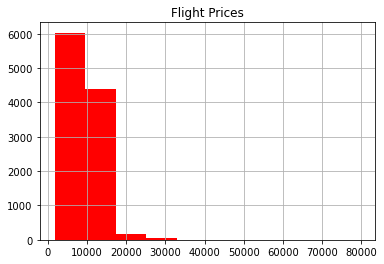

In [39]:
df_train["Price"].hist(grid=True,color='red')
plt.title("Flight Prices")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

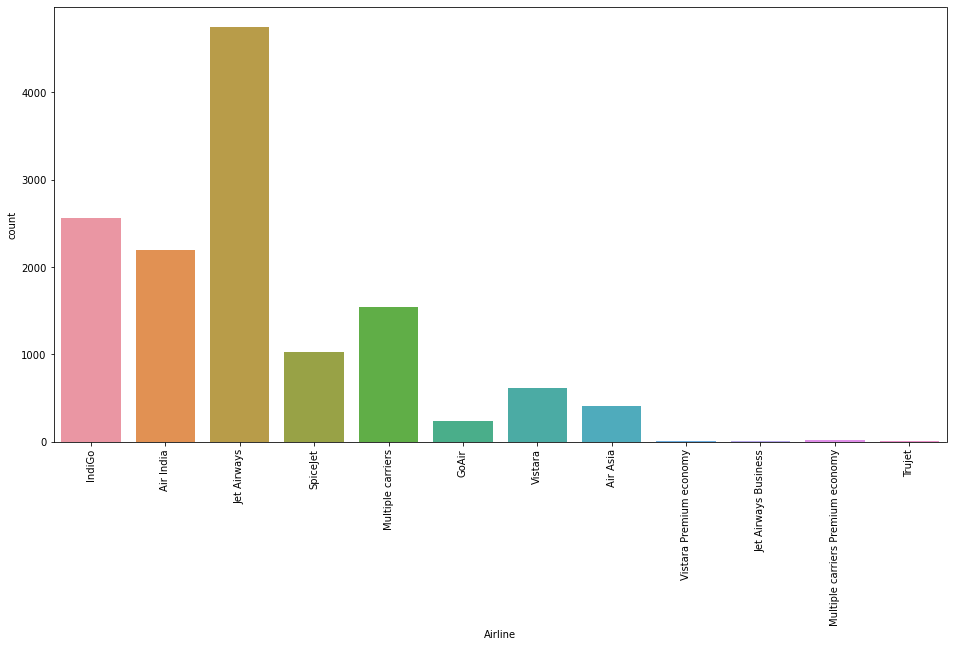

In [40]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Airline'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '2019-03-24T00:00:00.000000000'),
  Text(1, 0, '2019-01-05T00:00:00.000000000'),
  Text(2, 0, '2019-09-06T00:00:00.000000000'),
  Text(3, 0, '2019-12-05T00:00:00.000000000'),
  Text(4, 0, '2019-01-03T00:00:00.000000000'),
  Text(5, 0, '2019-06-24T00:00:00.000000000'),
  Text(6, 0, '2019-12-03T00:00:00.000000000'),
  Text(7, 0, '2019-05-27T00:00:00.000000000'),
  Text(8, 0, '2019-01-06T00:00:00.000000000'),
  Text(9, 0, '2019-04-18T00:00:00.000000000'),
  Text(10, 0, '2019-09-05T00:00:00.000000000'),
  Text(11, 0, '2019-04-24T00:00:00.000000000'),
  Text(12, 0, '2019-03-03T00:00:00.000000000'),
  Text(13, 0, '2019-04-15T00:00:00.000000000'),
  Text(14, 0, '2019-12-06T00:00:00.000000000'),
  Text(15, 0, '2019-06-03T00:00:00.000000000'),
  Text(16, 0, '2019-03-21T00:00:00.000000000'),
  Text(1

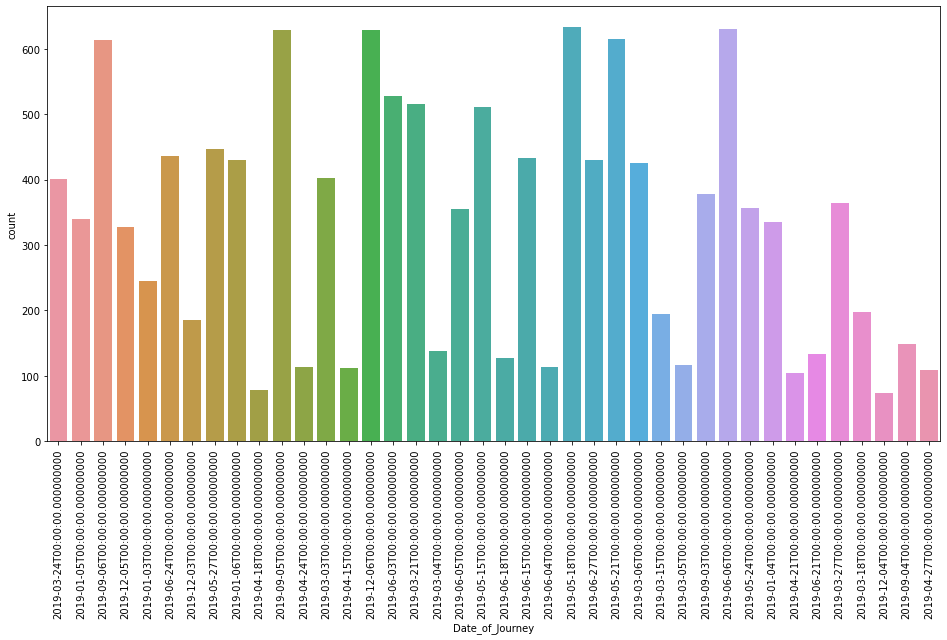

In [41]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Date_of_Journey'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Source', ylabel='count'>

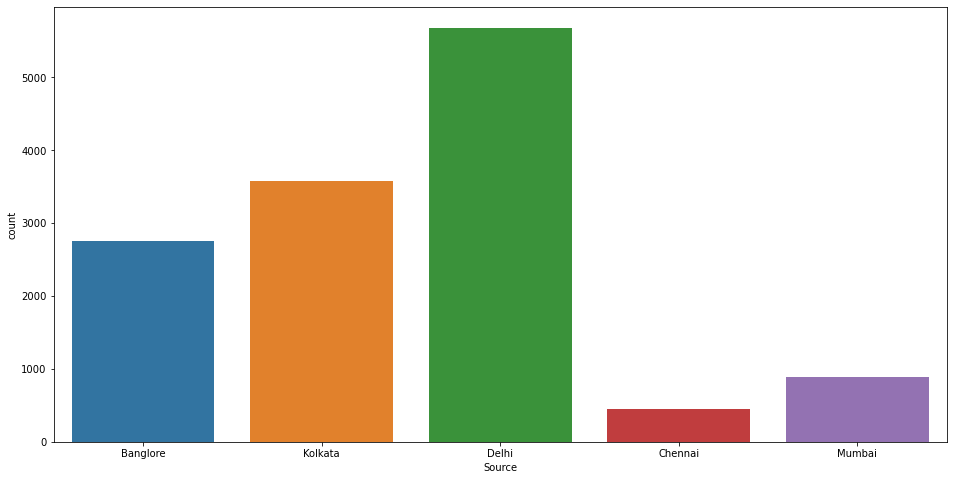

In [42]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Source'])
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Destination', ylabel='count'>

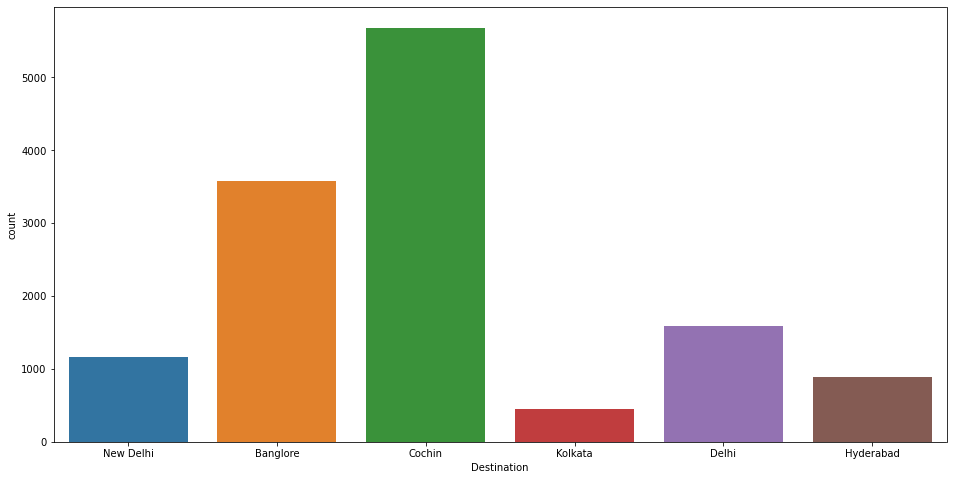

In [43]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Destination'])
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

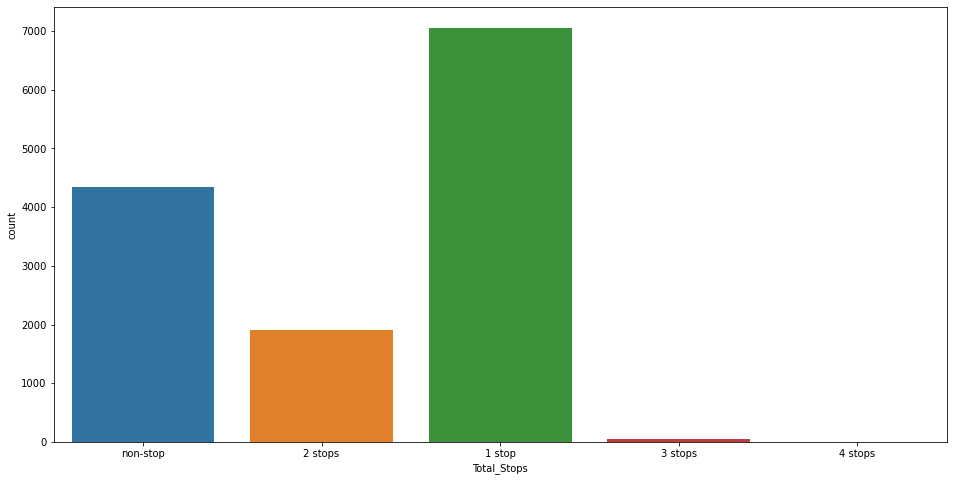

In [44]:
plt.subplots(figsize=(16,8))
sns.countplot(df_concat['Total_Stops'])
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

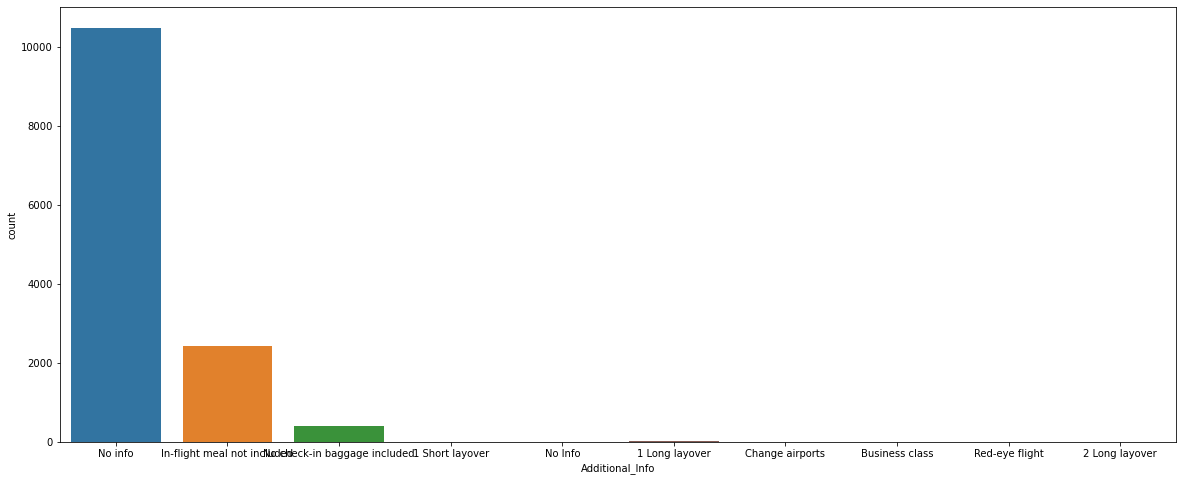

In [45]:
plt.subplots(figsize=(20,8))
sns.countplot(df_concat['Additional_Info'])
#plt.xticks(rotation=90)

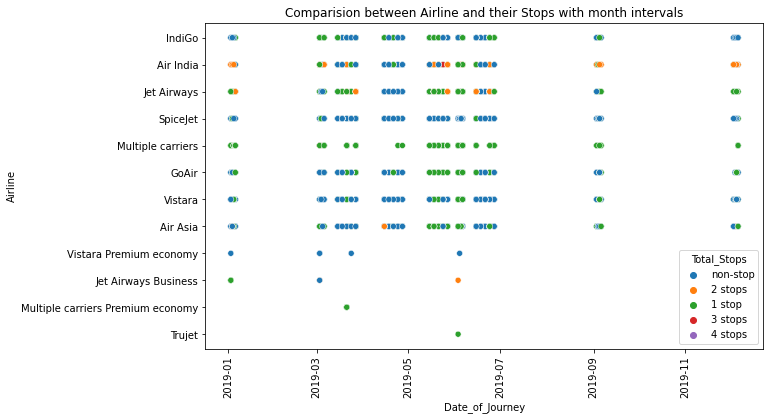

In [46]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Airline and their Stops with month intervals')
sns.scatterplot(df_concat['Date_of_Journey'],df_concat['Airline'],hue=df_concat['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

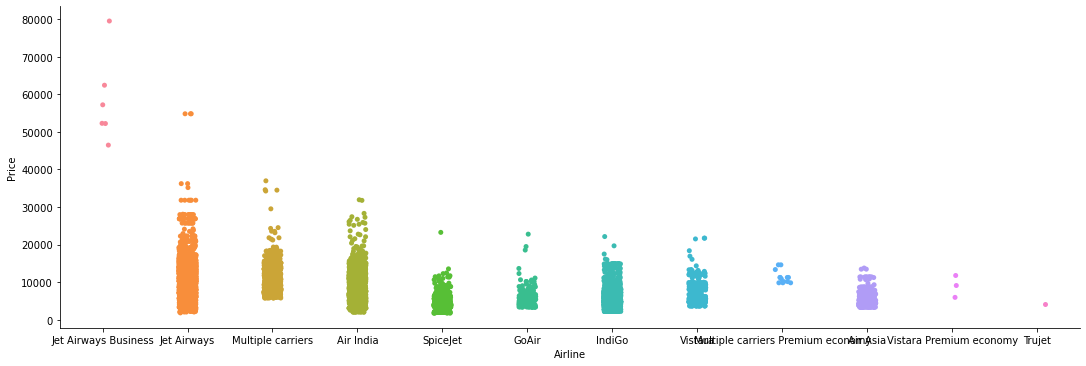

In [47]:
sns.catplot(y = "Price", x = "Airline", data = df_concat.sort_values("Price", ascending = False), height = 5, aspect = 3)
plt.show()

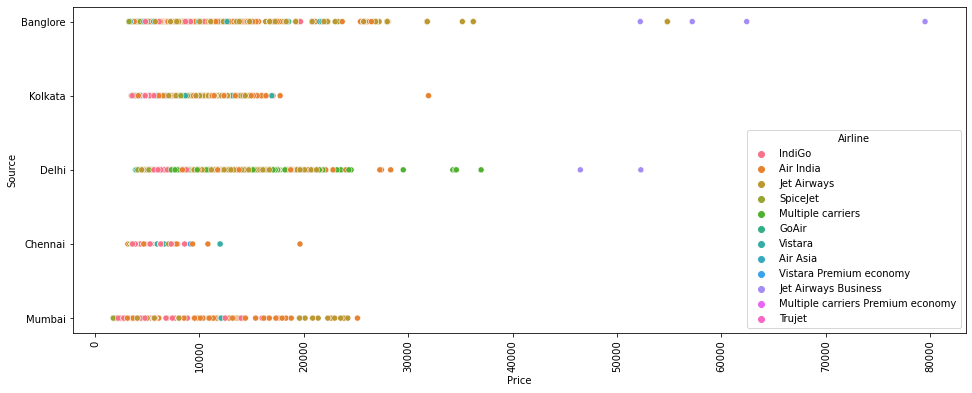

In [48]:
plt.figure(figsize=[16,6])
sns.scatterplot(df_concat['Price'],df_concat['Source'],hue=df_concat['Airline'])
plt.xticks(rotation=90)
plt.show()

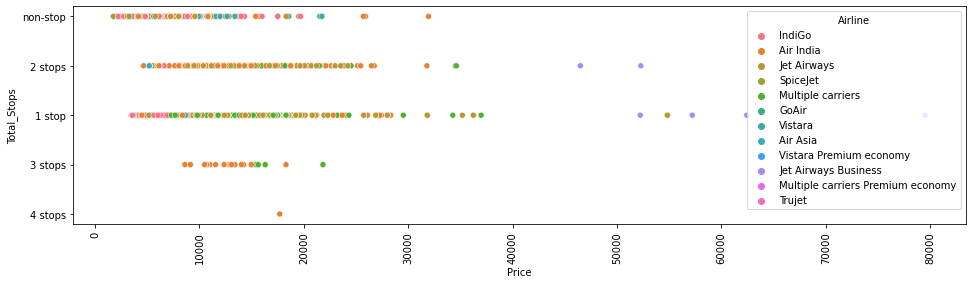

In [49]:
plt.figure(figsize=[16,4])
sns.scatterplot(df_concat['Price'],df_concat['Total_Stops'],hue=df_concat['Airline'])
plt.xticks(rotation=90)
plt.show()

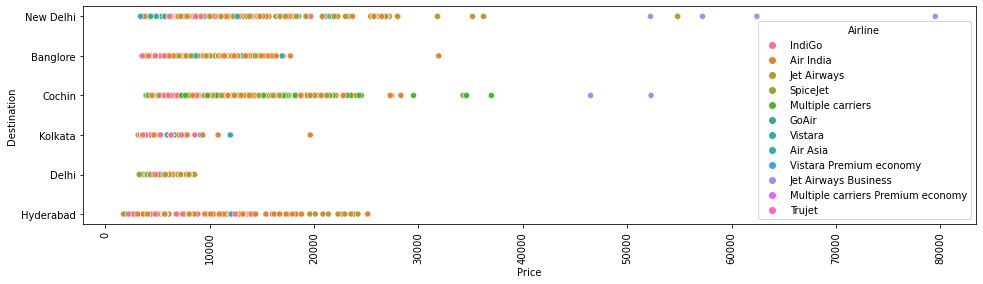

In [50]:
plt.figure(figsize=[16,4])
sns.scatterplot(df_concat['Price'],df_concat['Destination'],hue=df_concat['Airline'])
plt.xticks(rotation=90)
plt.show()

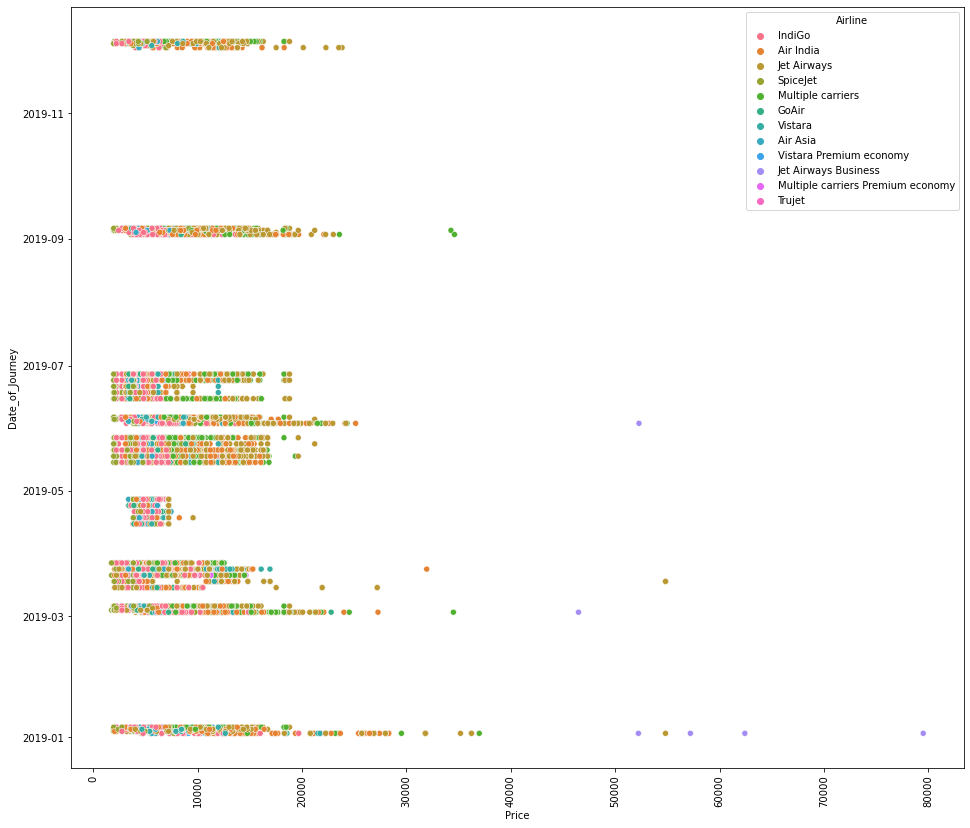

In [51]:
plt.figure(figsize=[16,14])
sns.scatterplot(df_concat['Price'],df_concat['Date_of_Journey'],hue=df_concat['Airline'])
plt.xticks(rotation=90)
plt.show()

#### Dropping columns:
As we have done feature extractions for some column. let remove those original columns as the data of it is processed and extracted in new columns.

In [52]:
df_duration.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route'],axis=1,inplace=True)

In [53]:
df_duration.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dataset_type,journey_day,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,Train,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,Train,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,Train,6,9,9,25,4,25,19,0


# Encoding:

In [54]:
obj_df = df_duration.select_dtypes(include=['object']).copy()
obj_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,dataset_type
0,IndiGo,Banglore,New Delhi,non-stop,No info,Train
1,Air India,Kolkata,Banglore,2 stops,No info,Train
2,Jet Airways,Delhi,Cochin,2 stops,No info,Train
3,IndiGo,Kolkata,Banglore,1 stop,No info,Train
4,IndiGo,Banglore,New Delhi,1 stop,No info,Train


In [55]:
df_duration.skew()

Price              1.812552
journey_day        0.389526
journey_month      0.621749
Dep_hours          0.109087
Dep_minutes        0.159397
Arrival_hours     -0.384591
Arrival_minutes    0.111711
Duration_hours     0.857425
Duration_mins     -0.093531
dtype: float64

In [56]:
LE=LabelEncoder()
for column in obj_df:
    df_duration.loc[:,column] = LE.fit_transform(df_duration.loc[:,column])
df_duration.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dataset_type,journey_day,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,3,0,5,4,8,3897.0,1,24,3,22,20,1,10,2,50
1,1,3,0,1,8,7662.0,1,5,1,5,50,13,15,7,25
2,4,2,1,1,8,13882.0,1,6,9,9,25,4,25,19,0
3,3,3,0,0,8,6218.0,1,5,12,18,5,23,30,5,25
4,3,0,5,0,8,13302.0,1,3,1,16,50,21,35,4,45


In [57]:
df_duration.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dataset_type,journey_day,journey_month,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,1.451026,7.407743,9087.064121,0.799985,12.551146,5.549274,12.513254,24.507264,13.396061,24.664146,10.234686,28.341695
std,2.363997,1.178607,1.473368,1.804171,1.198393,4611.359167,0.400026,8.759967,2.998690,5.736273,18.832385,6.896145,16.559723,8.474288,16.905431
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,1.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,1.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,1.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,1.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


# Lets Check Outliers with Box Plot:

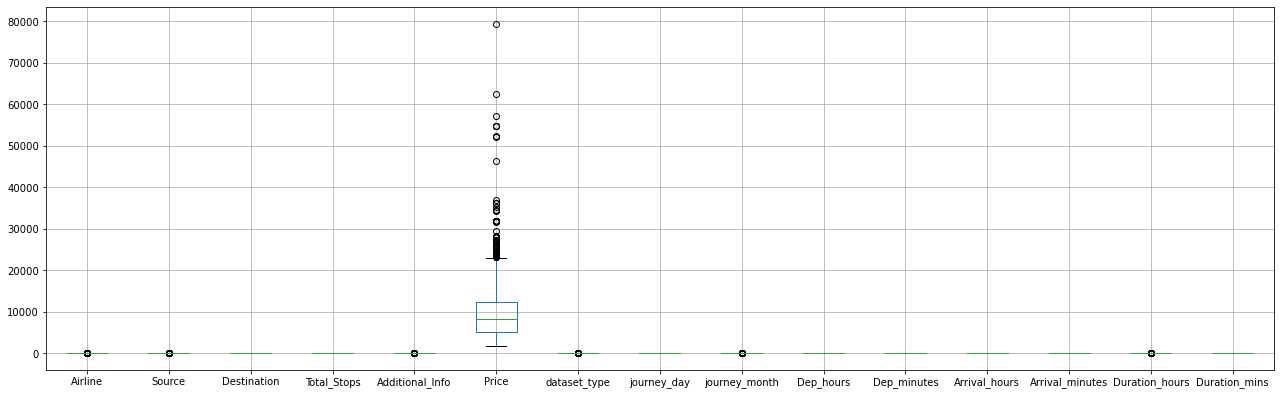

In [58]:
df_duration.iloc[:,0:18].boxplot(figsize=[22,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Outliers Removal:

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df_duration))
df_zscore=df_duration[(z<3).all(axis=1)]

In [60]:
df_zscore.shape

(0, 15)

In [61]:
df_duration.shape

(13354, 15)

# Skewness Removal:

In [62]:
#Lets seprate the train and test
df_newtrain=df_duration.loc[df_duration["dataset_type"]==1]
df_newtest=df_duration.loc[df_duration["dataset_type"]==0]
#df_newtest.reset_index(drop=True,inplace=True)

In [63]:
#Lets drop the Fees from test dataset as that is the o/p variable that needs to be predicted
df_newtest.drop(columns=["Price"],inplace=True)

In [64]:
#lets drop "dataset_type" column from df_newtrain and df_newtest
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

In [65]:
#seprating input and output from df_newtrain
x=df_newtrain.drop(columns=["Price"])
y=df_newtrain[["Price"]]

In [66]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [67]:
df_skew.skew()

Airline           -0.015312
Source            -0.238259
Destination        0.041560
Total_Stops        0.325203
Additional_Info   -1.372067
journey_day        0.017017
journey_month     -0.026453
Dep_hours         -0.104207
Dep_minutes       -0.359559
Arrival_hours     -0.356788
Arrival_minutes   -0.347616
Duration_hours    -0.029635
Duration_mins     -0.375897
dtype: float64

In [68]:
x=df_skew

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)
x=pd.DataFrame(x)

# Best Random State Selection:

In [70]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=DecisionTreeRegressor()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)


Best accuracy is   0.8655109654732823   at random_state: 157


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

# Model Building:

### Lets try to check with 4 to 5 models for better Performances:

In [74]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 317.01390963 -122.12336736  441.26209729 -710.22290494  478.00090735
  -774.99666655 -310.42264188  190.42346283  -41.51570684 -123.73166509
    18.0551764  2526.98886008  -89.98700842]]
Intercept   :  [9079.668796]
Score       :  0.4359494017007989
 
error
Mean absolute error    : 2462.7872141897183
Mean squared error     : 13465799.562282491
Root mean squared error: 3669.577572729931
 
r2 score :  0.4087392081587289


In [75]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [ 317.01377757 -122.12330463  441.2619706  -710.22281534  478.00076235
 -774.99656925 -310.42252886  190.42333665  -41.51563759 -123.73156295
   18.05505232 2526.9887318   -89.98690981]
Intercept   :  [9079.66879572]
Score       :  0.435949401700792
 
error
Mean absolute error    : 2462.787197570609
Mean squared error     : 13465799.516553676
Root mean squared error: 3669.5775664991297
 
r2 score :  0.40873921016660486


In [76]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[ 317.01389694 -122.12337653  441.26207724 -710.22292612  478.00089576
  -774.99665884 -310.42263604  190.42345766  -41.51570656 -123.73166347
    18.05517499 2526.98880656  -89.98701275]]
Intercept   :  [9079.6687957]
Score       :  0.43594940170079877
 
error
Mean absolute error    : 2462.7872155020427
Mean squared error     : 13465799.560950957
Root mean squared error: 3669.5775725485023
 
r2 score :  0.4087392082171942


In [77]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.978677066412813
 
error
Mean absolute error    : 701.3124986908662
Mean squared error     : 2499717.680413356
Root mean squared error: 1581.0495502713873
 
r2 score :  0.8902415672931416


In [78]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8286743335844099
 
error
Mean absolute error    : 1289.5129878685875
Mean squared error     : 4270506.622573001
Root mean squared error: 2066.5204142647613
 
r2 score :  0.8124891793058954


In [79]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.3504936068467438
 
error
Mean absolute error    : 3149.7607829002377
Mean squared error     : 14252201.070913466
Root mean squared error: 3775.2087453428935
 
r2 score :  0.3742096299819758


In [80]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt.score(x_train,y_train)
print("Score       : ",dt.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9957953580635919
 
error
Mean absolute error    : 800.6286850725315
Mean squared error     : 3653282.2019575727
Root mean squared error: 1911.3561159442718
 
r2 score :  0.8395904738104595


In [81]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Price : ", pred )
print("Actual Price :", y_test)

Predicted Price :  [[12361.84324918]
 [12134.52673289]
 [ 7224.25312019]
 ...
 [ 5157.91371811]
 [ 8676.49897275]
 [ 3760.43696256]]
Actual Price :         Price
9835  13381.0
8438   9663.0
9575   4226.0
924   17234.0
1189  15554.0
...       ...
8608   7155.0
5985  11087.0
5790   4148.0
4152  14714.0
8839   5769.0

[2137 rows x 1 columns]


In [89]:
scr=cross_val_score(lm,x,y,cv=5)
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.4285368664248592


In [90]:
scr=cross_val_score(ls,x,y,cv=5)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.4285368674124232


In [91]:
scr=cross_val_score(rd,x,y,cv=5)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.42853686645694067


In [92]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.8740202574831153


In [93]:
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.811671666572375


In [95]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.3554570067336241


In [96]:
scr=cross_val_score(dt,x,y,cv=5,scoring="r2")
print("Cross Validation Score of DecisiontreeRegressor Model is : ", scr.mean())

Cross Validation Score of DecisiontreeRegressor Model is :  0.8010006800954933


# Parameter Tuning:

### 1st Tuning:
Random Forest Regressor

In [97]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [98]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [99]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [100]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mse'}

In [101]:
mod=RandomForestRegressor(bootstrap= True, criterion='mse',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

88.97108207290636


### 2nd Tuning:
GradiantBoosting Regressor

In [102]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500]}

In [103]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2") #Tuning

In [104]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [105]:
gcv.best_params_

{'learning_rate': 0.04, 'n_estimators': 1500, 'subsample': 0.9}

In [106]:
mod2=GradientBoostingRegressor(learning_rate=0.04,n_estimators=1500,subsample= 0.9,random_state=maxRS)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred)*100)

87.69949222584629


# 3rd Tuning:
DecisionTree Regressor

In [107]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [108]:
gcv=GridSearchCV(DecisionTreeRegressor(), parameters,cv=5) #Tuning

In [109]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [110]:
gcv.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [111]:
mod3=DecisionTreeRegressor(random_state=maxRS,max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

51.97787391932213


# 4th Tuning:
AdaBoost Regressor

In [112]:
boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=maxRS)
parameters = {'n_estimators': (1, 2),'base_estimator__max_depth': (1, 2)}

In [113]:
gcv=GridSearchCV(boost, parameters,cv=5) #Tuning

In [114]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         random_state=157),
             param_grid={'base_estimator__max_depth': (1, 2),
                         'n_estimators': (1, 2)})

In [115]:
gcv.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 1}

In [116]:
mod4=AdaBoostRegressor(n_estimators=1,random_state=maxRS)
mod4.fit(x_train,y_train)
pred=mod4.predict(x_test)
print(r2_score(y_test,pred)*100)

57.79312462981561


# Obsevation: RandomForest Regressor  & GradiantBoosting Regressor is the one having a better score of 89% & 88% respectively.Lets take this for saving.

In [118]:
import joblib
joblib.dump(mod,"Flight_price.pkl")

['Flight_price.pkl']

In [119]:
mod=joblib.load("Flight_price.pkl")

In [120]:
prediction=mod.predict(x_test)

In [121]:
print(r2_score(y_test,prediction)*100)

88.97108207290636


In [122]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [123]:
prediction.to_csv('Flight_price.csv') #Saving the predictions

In [124]:
prediction

,0
0,13393.240000
1,9395.180000
2,4275.860000
3,16985.948333
4,15515.530000
...,...
2132,8030.240000
2133,11114.300000
2134,5151.940000
2135,15002.790000


# Conclution & Observation:
Hence we have got Best accuracy with Random Forest Regressor model. We have saved and loaded that for checking purpose and predicted in above steps.

